ბაზასთან კავშირი შექმნილია
ცხრილები ბაზაში: [('Student_data',)] 

------[მონაცემთა წაკითხვა]------
GPA > 3.0 სტუდენტები: [(1002, 18, 3.042914833436377), (1006, 18, 3.0841836144863937), (1010, 16, 3.5734742103297656), (1039, 15, 3.0189058584279675), (1045, 18, 4.0), (1065, 17, 3.3473567435078095), (1066, 16, 3.2618553073332905), (1070, 16, 3.2839165218973836), (1074, 16, 3.300928568970799), (1092, 18, 3.5069200713692137), (1093, 16, 3.552286943350944), (1111, 18, 3.2208069781948727), (1112, 17, 3.5451594318003106), (1113, 18, 3.0895989530746473), (1120, 15, 3.619460869693516), (1124, 17, 3.101673809015105), (1125, 15, 3.4982573417733205), (1127, 16, 3.5350037581843186), (1132, 15, 3.030439088696523), (1133, 15, 3.5824218723119596), (1135, 17, 3.161436270258364), (1141, 18, 3.1394815463803876), (1147, 17, 3.5888879397650117), (1155, 15, 3.0756193536614336), (1161, 17, 3.3759940088028393), (1163, 18, 3.7185869042869646), (1180, 17, 3.2742334588098787), (1181, 15, 3.1860603780389143), (118

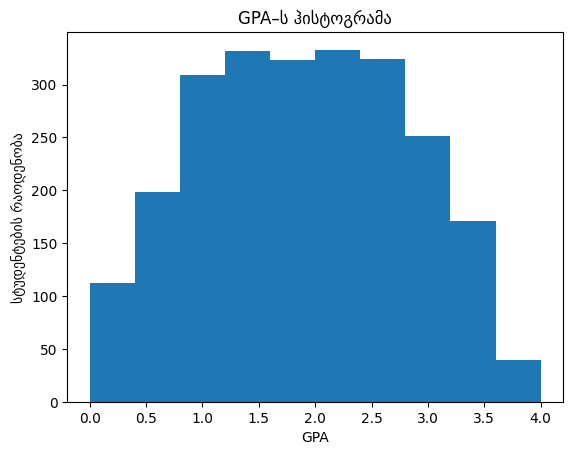

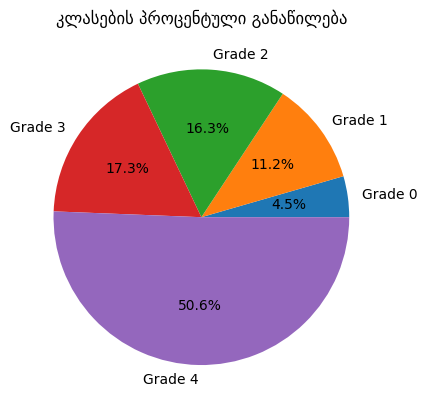

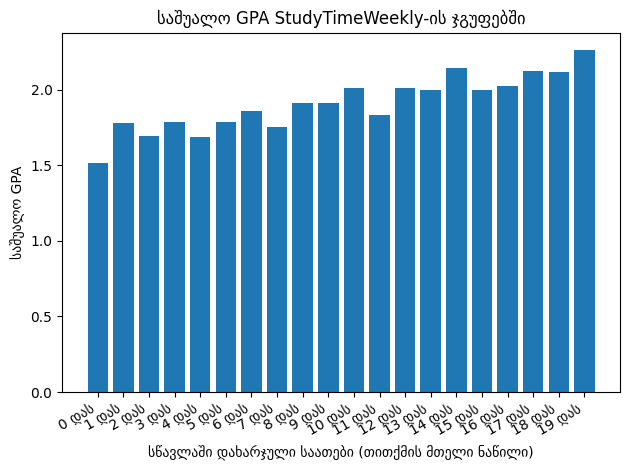

კავშირი დახურულია



In [2]:
import sqlite3
import matplotlib.pyplot as plt


#ბაზასთან დაკავშირება და დახურვა
def connect_db(path='students_data.db.sqlite'):
    """დააბრუნებს კავშირს და კურსორს"""
    conn = sqlite3.connect(path)
    cursor = conn.cursor()
    print("ბაზასთან კავშირი შექმნილია")
    return conn, cursor

def close_db(conn):
    """ხურავს კავშირს"""
    conn.close()
    print("კავშირი დახურულია\n")


#ცხრილების სიის ჩვენება
def list_tables(cursor):
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    print("ცხრილები ბაზაში:", tables, "\n")


#მონაცემთა წაკითხვა WITH WHERE პირობით
def query_data(cursor):
    print("------[მონაცემთა წაკითხვა]------")
    # მაგალითად: ყველა სტუდენტი, რომელთა GPA > 3.0
    cursor.execute("SELECT StudentID, Age, GPA FROM Student_data WHERE GPA > 3.0")
    high_gpa = cursor.fetchall()
    print("GPA > 3.0 სტუდენტები:", high_gpa)

    # ერთი სტუდენტი, ვისაც Volunteering=1 აქვს
    cursor.execute("SELECT * FROM Student_data WHERE Volunteering=1")
    one = cursor.fetchone()
    print("ერთი მოხალისე სტუდენტი:", one)

    # პირველი 3 ჩანაწერი ცხრილიდან
    cursor.execute("SELECT * FROM Student_data")
    three = cursor.fetchmany(3)
    print("პირველი 3 ჩანაწერი:", three, "\n")


#ჩანაწერის დამატება (input()-ით)
def insert_record(cursor, conn):
    print("------[ჩანაწერის დამატება]------")
    sid = int(input("შეიყვანე StudentID: "))
    age = int(input("შეიყვანე Age: "))
    gender = int(input("შეიყვანე Gender (0/1): "))
    ethnicity = int(input("შეიყვანე Ethnicity (კოდი): "))
    parental = int(input("შეიყვანე ParentalEducation (კოდი): "))
    study = float(input("შეიყვანე StudyTimeWeekly: "))
    absences = int(input("შეიყვანე Absences: "))
    tutoring = int(input("შეიყვანე Tutoring (0/1): "))
    support = int(input("შეიყვანე ParentalSupport (0/1): "))
    extra = int(input("შეიყვანე Extracurricular (0/1): "))
    sports = int(input("შეიყვანე Sports (0/1): "))
    music = int(input("შეიყვანე Music (0/1): "))
    vol = int(input("შეიყვანე Volunteering (0/1): "))
    gpa = float(input("შეიყვანე GPA: "))
    grade = int(input("შეიყვანე GradeClass: "))

    cursor.execute("""
        INSERT INTO Student_data
        (StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly,
         Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music,
         Volunteering, GPA, GradeClass)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, (sid, age, gender, ethnicity, parental, study,
          absences, tutoring, support, extra, sports,
          music, vol, gpa, grade))
    conn.commit()
    print("ჩანაწერი დამატებულია\n")


#ჩანაწერის განახლება (input()-ით)
def update_record(cursor, conn):
    print("------[ჩანაწერის განახლება]------")
    sid = int(input("რომელი StudentID განაახლოთ? "))
    new_gpa = float(input("შეიყვანე ახალი GPA: "))
    cursor.execute("UPDATE Student_data SET GPA = ? WHERE StudentID = ?", (new_gpa, sid))
    conn.commit()
    print("ჩანაწერი განახლებულია\n")


#ჩანაწერის წაშლა (input()-ით)
def delete_record(cursor, conn):
    print("------[ჩანაწერის წაშლა]------")
    sid = int(input("რომელი StudentID წაშალოთ? "))
    cursor.execute("DELETE FROM Student_data WHERE StudentID = ?", (sid,))
    conn.commit()
    print("ჩანაწერი წაშლილია\n")


#ვიზუალიზაცია Matplotlib-ით
#ჰისტოგრამა — GPA-ს განაწილება
def plot_histogram(cursor):
    cursor.execute("SELECT GPA FROM Student_data")
    values = [row[0] for row in cursor.fetchall()]
    plt.hist(values, bins=10)
    plt.title("GPA–ს ჰისტოგრამა")
    plt.xlabel("GPA")
    plt.ylabel("სტუდენტების რაოდენობა")
    plt.show()


#წრიული დიაგრამა — GradeClass-ის განაწილება
def plot_pie(cursor):
    cursor.execute("SELECT GradeClass FROM Student_data")
    classes = [row[0] for row in cursor.fetchall()]
    counts = {c: classes.count(c) for c in set(classes)}
    plt.pie(counts.values(), labels=[f"Grade {c}" for c in counts], autopct='%1.1f%%')
    plt.title("კლასების პროცენტული განაწილება")
    plt.show()

#სვეტური დიაგრამა — საშუალო GPA StudyTimeWeekly ჯგუფებში
def plot_bar(cursor):
    # ვყოლებთ StudyTimeWeekly-ის integer ნაწილს ჯგუფებად
    cursor.execute("SELECT CAST(StudyTimeWeekly AS INTEGER) AS group_, AVG(GPA) "
                   "FROM Student_data GROUP BY group_")
    data = cursor.fetchall()
    groups = [str(r[0]) + " დას" for r in data]
    avgs = [r[1] for r in data]
    plt.bar(groups, avgs)
    plt.title("საშუალო GPA StudyTimeWeekly-ის ჯგუფებში")
    plt.xlabel("სწავლაში დახარჯული საათები (თითქმის მთელი ნაწილი)")
    plt.ylabel("საშუალო GPA")
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()


#მთავარი ფუნქცია და პროგრამის გაშვება
def main():
    conn, cursor = connect_db()
    list_tables(cursor)
    query_data(cursor)
    plot_histogram(cursor)
    plot_pie(cursor)
    plot_bar(cursor)

    close_db(conn)

if __name__ == "__main__":
    main()